### Imports

In [30]:
import os
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from IPython.display import display, HTML

### Set data paths

In [ ]:
# Load training data
data_path = os.path.join(os.path.dirname(os.getcwd()), "jane-street-real-time-market-data-forecasting")
train = pl.scan_parquet(os.path.join(data_path, "train.parquet")).\
    select(
        pl.int_range(pl.len(), dtype=pl.UInt64).alias("id"),
        pl.all(),
    )

### Dataset types

In [8]:
# Get basic information about the dataset
train_schema = train.collect_schema()
train_symbol_count = train.select('symbol_id').unique().collect().height
train_date_count = train.select('date_id').unique().collect().height
train_time_count = train.select('time_id').unique().collect().height

# Display collected information
print("Dataset Information:")
print("-" * 50)
print(f"Number of columns: {len(train_schema)}")
print(f"Number of unique symbol_ids: {train_symbol_count}")
print(f"Number of unique days: {train_date_count}")
print(f"Number of times per day (max): {train_time_count}")
print("\nColumn Types:")
print("-" * 50)

# Group columns by data type
type_groups = {}
for col, dtype in train_schema.items():
    if dtype not in type_groups:
        type_groups[dtype] = []
    type_groups[dtype].append(col)

# Print columns grouped by data type
for dtype, cols in type_groups.items():
    print(f"\n{dtype}:")
    for col in cols:
        print(f"  - {col}")

print("\nNote: These statistics are based on the entire dataset and may take some time to compute.")

Dataset Information:
--------------------------------------------------
Number of columns: 94
Number of unique symbol_ids: 39
Number of unique days: 1699
Number of times per day (max): 968

Column Types:
--------------------------------------------------

UInt64:
  - id

Int16:
  - date_id
  - time_id
  - feature_11

Int8:
  - symbol_id
  - feature_09
  - feature_10

Float32:
  - weight
  - feature_00
  - feature_01
  - feature_02
  - feature_03
  - feature_04
  - feature_05
  - feature_06
  - feature_07
  - feature_08
  - feature_12
  - feature_13
  - feature_14
  - feature_15
  - feature_16
  - feature_17
  - feature_18
  - feature_19
  - feature_20
  - feature_21
  - feature_22
  - feature_23
  - feature_24
  - feature_25
  - feature_26
  - feature_27
  - feature_28
  - feature_29
  - feature_30
  - feature_31
  - feature_32
  - feature_33
  - feature_34
  - feature_35
  - feature_36
  - feature_37
  - feature_38
  - feature_39
  - feature_40
  - feature_41
  - feature_42
  - featur

### Example data and basic stats

In [ ]:
# Collect the first x rows
fetch_rows = 6795
train_first_rows = train.fetch(fetch_rows)

# Get stats
train_statistics = train.select(pl.all().exclude(['symbol_id', 'date_id', 'time_id', 'id'])).describe()

In [52]:
# Function to create a title with description
def create_title(title, description):
    return HTML(f"""
    <h3>{title}</h3>
    <p><em>{description}</em></p>
    """)

# First display with truncation
with pl.Config(tbl_rows=16, tbl_cols=-1):  # or whatever default number of rows you want
    display(create_title("The first x training rows", "--"))
    display(train_first_rows)

# Temporarily show all columns just for statistics
#pl.Config.set_tbl_columns(-1)
# Second display with all rows shown
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    display(create_title("Statistical Summary of Training Data", 
                         "This table provides key statistical measures for each column in the dataset, including count, mean, standard deviation, and quartiles."))
    display(train_statistics)

id,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
u64,i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i64
0,0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,null,0.28118,0.269163,0.349028,-0.012596,-0.225932,null,-1.073602,null,null,-0.181716,null,null,null,0.564021,2.088506,0.832022,null,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504,0
1,0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,null,-1.512286,-1.414357,-1.823322,-0.082763,-0.184119,null,null,null,null,null,null,null,null,-10.835207,-0.002704,-0.621836,null,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639,0
2,0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,null,-0.320921,-0.95809,-2.436589,0.070999,-0.245239,null,null,null,null,null,null,null,null,-1.420632,-3.515137,-4.67776,null,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828,0
3,0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,null,0.544138,-0.087091,-1.500147,-0.201288,-0.038042,null,null,null,null,null,null,null,null,0.382074,2.669135,0.611711,null,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0

statistic,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.7127338e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6827091e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.5918039e7,4.7127077e7,4.69255e7,4.7127112e7,4.7127112e7,4.7127338e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,4.6648881e7,4.6648881e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7126489e7,4.7127338e7,4.2826689e7,4.7059482e7,4.6034326e7,4.2826689e7,4.7059482e7,4.6034326e7,4.6810175e7,4.6810175e7,4.7127251e7,4.7127338e7,4.7127338e7,4.287324e7,4.7113533e7,4.608244e7,4.287324e7,4.7113533e7,4.608244e7,4.7127112e7,4.7127112e7,4.6648886e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6834511e7,4.6899772e7,4.6889675e7,4.6810175e7,4.6810175e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6643579e7,4.6643579e7,4.7068908e7,4.7068908e7,4.7107295e7,4.7107295e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7
"""null_count""",0.0,3.182052e6,3.182052e6,3.182052e6,3.182052e6,3.182052e6,0.0,0.0,0.0,300247.0,0.0,0.0,0.0,0.0,0.0,0.0,1.209299e6,261.0,201838.0,226.0,226.0,0.0,8.435985e6,0.0,0.0,0.0,0.0,8.435985e6,8.435985e6,0.0,0.0,0.0,8.435985e6,478457.0,478457.0,0.0,0.0,0.0,849.0,0.0,4.300649e6,67856.0,1.093012e6,4.300649e6,67856.0,1.093012e6,317163.0,317163.0,87.0,0.0,0.0,4.254098e6,13805.0,1.044898e6,4.254098e6,13805.0,1.044898e6,226.0,226.0,478452.0,0.0,0.0,0.0,292827.0,227566.0,237663.0,317163.0,317163.0,0.0,0.0,0.0,0.0,0.0,0.0,483759.0,483759.0,58430.0,58430.0,20043.0,20043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2.009445,0.573833,0.010192,0.573102,0.572745,-0.000852,-0.03838,-0.005058,-0.013839,0.082467,32.762992,4.875799,170.69312,-0.038973,-0.026642,-0.041218,-0.251219,-0.20489,-0.242808,-0.008927,-0.031894,-0.209704,0.037687,0.067906,0.072203,0.572287,0.092576,-0.049244,-0.234434,-0.155543,-0.215313,-0.2576,0.036165,0.420549,-0.015209,0.446928,0.445089,0.001806,0.037254,0.045619,0.030084,0.015741,0.041924,-0.063039,-0.053906,-0.080351,0.023377,-0.042955,-0.010571,-0.00172,-0.004013,-0.075708,-0.097575,-0.103892,0.074961,0.048527,0.086814,-0.028328,0.027874,-0.015198,-0.002545,-0.00665,0.012388,-0.179578,-0.145254,-0.166556,-0.043152,-0.050118,-0.042604,-0.023995,-0.040502,-0.032992,-0.021157,-0.036682,-0.016559,-0.023103,-0.002237,-0.008022,-0.00659,-0.012559,-0.001545,-0.000866,-0.000142,-0.01638,-0.012442,-0.016624,-0.002141,0.001476,-0.001114,5.409279
"""std""",1.129388,1.327413,1.084941,1.32287,1.32284

### Tag meanings

What do the numbers mean Mason?!?!?

### Target Distribution

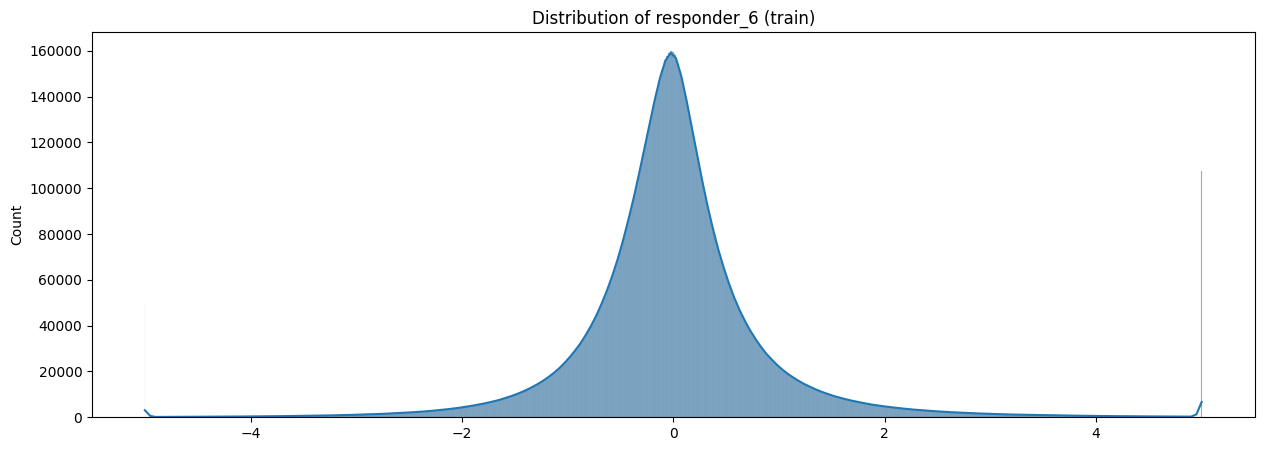

In [7]:
# Distribution of responder_6 (our target)
responder_6 = train.select('responder_6').collect()
plt.figure(figsize=(15, 5))
sns.histplot(responder_6['responder_6'], kde=True)
plt.title('Distribution of responder_6 (train)')
plt.show()

## Correlations

### Non-time series correlation

In [23]:
def get_target_correlations(lazy_df, feature_cols, target_col):
    correlations = []
    
    with tqdm(total=len(feature_cols), desc="Computing correlations") as pbar:
        for feature in feature_cols:
            corr = lazy_df.select(pl.corr(feature, target_col)).collect().item()
            correlations.append((feature, corr))
            pbar.update(1)
    
    return sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

In [ ]:
# Get feature columns
feature_cols = [col for col in train.columns]
target_col = 'responder_6'

# Compute correlations with progress bar
print("Starting correlation computation with target variable...")
target_correlations = get_target_correlations(train, feature_cols, target_col)

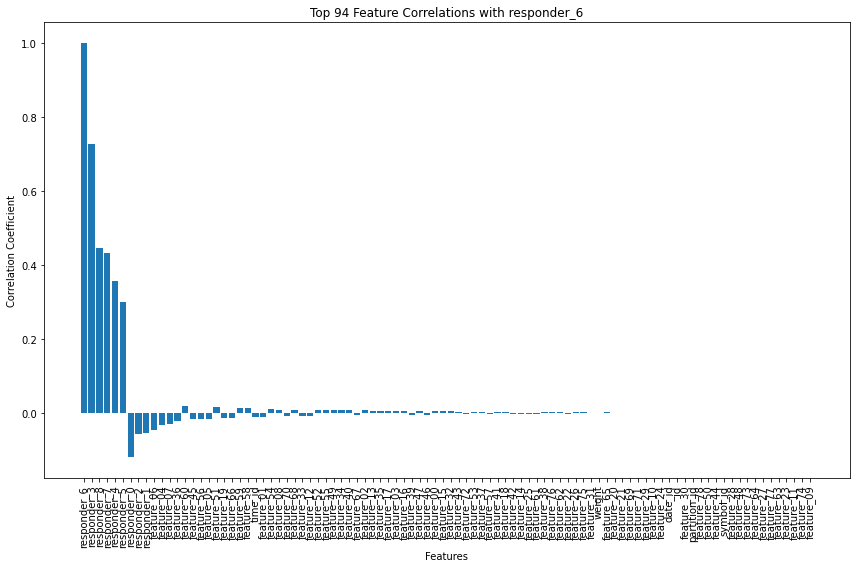

In [39]:

def plot_top_correlations(correlations, n=94):
    top_n = correlations[:n]
    features, corrs = zip(*top_n)
    
    plt.figure(figsize=(12, 8))
    plt.bar(features, corrs)
    plt.xticks(rotation=90)
    plt.title(f'Top {n} Feature Correlations with responder_6')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

plot_top_correlations(target_correlations)

### Time series - lagged correlations

In [11]:
def compute_lagged_correlations(df: pl.LazyFrame, feature_cols: list, target_col: str, max_lag: int = 5) -> pl.DataFrame:
    """
    Compute lagged correlations between features and target for a LazyFrame, excluding NaN correlations.
    
    Args:
    df (pl.LazyFrame): Input LazyFrame
    feature_cols (list): List of feature column names
    target_col (str): Name of the target column
    max_lag (int): Maximum lag to consider
    
    Returns:
    pl.DataFrame: Dataframe of average correlations, correlation counts, and NaN counts
    """
    correlations = []
    
    # Get unique date_ids
    unique_dates = df.select(pl.col('date_id').unique()).collect().to_series().sort()
    
    for date_id in tqdm(unique_dates, desc="Processing dates"):
        # Filter data for the current date
        day_data = df.filter(pl.col('date_id') == date_id)
        
        for feature in feature_cols:
            for lag in range(1, max_lag + 1):
                feature_lag_key = f"{feature}_lag{lag}"
                
                # Compute correlation between lagged feature and target
                corr = day_data.select([
                    pl.corr(pl.col(feature).shift(lag), pl.col(target_col)).alias('correlation')
                ]).collect().item()
                
                correlations.append((feature_lag_key, date_id, corr))
    
    # Convert correlations to DataFrame and compute statistics
    corr_df = pl.DataFrame(correlations, schema=['feature_lag', 'date_id', 'correlation'])
    
    result = (corr_df
        .lazy()
        .group_by('feature_lag')
        .agg([
            pl.col('correlation').mean().alias('avg_correlation'),
            pl.col('correlation').count().alias('total_count'),
            pl.col('correlation').filter(pl.col('correlation').is_not_nan()).count().alias('valid_count')
        ])
        .with_columns([
            (pl.col('valid_count') / pl.col('total_count') * 100).alias('valid_percentage'),
            (pl.col('total_count') - pl.col('valid_count')).alias('nan_count')
        ])
        .sort('avg_correlation', descending=True)
        .collect()
    )
    
    return result


In [22]:
# Usage
# Get feature columns without triggering the performance warning
feature_cols = [col for col in train.collect_schema().names() if col.startswith('responder_6') or col.startswith('responder_3') or col.startswith('responder_8') or col.startswith('responder_7')]
target_col = 'responder_6'
max_lag = 2

print("Computing lagged correlations...")
lagged_correlations = compute_lagged_correlations(train, feature_cols, target_col, max_lag)

Computing lagged correlations...


Processing dates: 100%|██████████| 1699/1699 [02:51<00:00,  9.92it/s]
/monfs01/projects/ys68/v_envs/pyenv/versions/3.10.14/lib/python3.10/functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


In [24]:
# Display the results
print(lagged_correlations)

shape: (8, 6)
┌──────────────────┬─────────────────┬─────────────┬─────────────┬──────────────────┬───────────┐
│ feature_lag      ┆ avg_correlation ┆ total_count ┆ valid_count ┆ valid_percentage ┆ nan_count │
│ ---              ┆ ---             ┆ ---         ┆ ---         ┆ ---              ┆ ---       │
│ str              ┆ f64             ┆ u32         ┆ u32         ┆ f64              ┆ u32       │
╞══════════════════╪═════════════════╪═════════════╪═════════════╪══════════════════╪═══════════╡
│ responder_6_lag1 ┆ 0.052003        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ responder_6_lag2 ┆ 0.051005        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ responder_3_lag1 ┆ 0.044731        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ responder_3_lag2 ┆ 0.042984        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ responder_8_lag1 ┆ 0.033432        ┆ 1699        ┆ 1699        ┆ 100.0            ┆ 0         │
│ resp